# Secrets of Vinho Verde

This week we will use the power of the **scikit-learn** library to establish which **factors** contribute to a great glass of red wine.

1599 wines were tested by at least 3 wine experts and given a quality grade from **0** (terrible) to **10** (excellent).

There were **11 factors** measured: *fixed acidity*, *volatile acidity*, *citric acid*, *residual sugar*, *chlorides*, *free and total sulphur dioxide*, *density*, *pH*, *sulphates* and *alcohol*.

In [ ]:
import pandas as pd

# Load in the red wine data from the UCI ML website.
df_redwine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

In [ ]:
# Take a look
print(df_redwine.head(10))
# Data dimensionality (rows, colums)
print(df_redwine.shape)
# Data distributing
df_redwine.info()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

## Task

In this task, you have to:
1. Split the set in training and testing sets (80-20).
2. Apply the following classification methods:
  * Gaussian Naive Bayes (NB)
  * Decision Tree (DT)
  * K-Nearest Neighbors (KNN)
    * n_neighbors = {3, 5},
    * weights = {'uniform', 'distance'}
  * Random Forest (RF)
    * n_estimators = 100

3. Evaluate the quality of each model by computing:
  * Confusion matrix
  * ROC
  * Cross-validation score

**Question:**
Which model/configuration performs better predictions?


Método de Gaussian Naive Bayes: 0.5375
Método de Decission Tree Classifier: 0.5625
Método de K-Nearest Neighbors (n_neighbors 3, weights=uniform): 0.5125
Método de K-Nearest Neighbors (n_neighbors 3, weights=distance): 0.584375
Método de K-Nearest Neighbors (n_neighbors 5, weights=uniform): 0.48125
Método de K-Nearest Neighbors (n_neighbors 5, weights=distance): 0.59375
Método de Random Forest con n_estimators 100: 0.725
Evaluación del método GaussianNB con Confusion Matrix: 
[[ 0  0  1  1  0  0]
 [ 0  0  7  3  0  1]
 [ 2  5 86 34  8  0]
 [ 0  3 33 73 29  4]
 [ 1  0  0 11 13  2]
 [ 0  0  0  0  3  0]]
Evaluación del método Decision Tree con Confusion Matrix: 
[[  0   0   2   0   0   0]
 [  0   0   7   3   1   0]
 [  0   0 104  25   6   0]
 [  0   0  56  66  20   0]
 [  0   0   2  15  10   0]
 [  0   0   1   0   2   0]]
Evaluación del método K-Nearest Neighbors con Confusion Matrix: 
[[ 0  0  2  0  0  0]
 [ 0  1  8  2  0  0]
 [ 3  2 89 37  4  0]
 [ 1 12 55 64  9  1]
 [ 0  3  5  9 10  0]


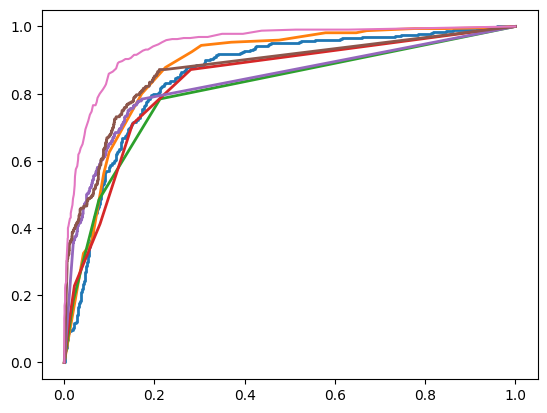

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score

#1.- Split the set in training and testing sets (80-20).
X = df_redwine.drop('quality', axis=1)
y = df_redwine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


#2.- Apply the following classification methods.

# Gaussian Naive Bayes (NB)
gnb=GaussianNB()
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Método de Gaussian Naive Bayes: "+str(accuracy))

# Decision Tree (DT)
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)
y_predDT=clf.predict(X_test)
accuracyDT=accuracy_score(y_test,y_predDT)
print("Método de Decission Tree Classifier: "+str(accuracyDT))

# K-Nearest Neighbors (KNN)
# n_neighbors = {3, 5}
# weights = {'uniform', 'distance'}
knn3U=KNeighborsClassifier(n_neighbors=3, weights="uniform")
knn3U.fit(X_train, y_train)
scoreKNN3U=knn3U.predict(X_test)
accuracyKNN3U=accuracy_score(y_test,scoreKNN3U)
print("Método de K-Nearest Neighbors (n_neighbors 3, weights=uniform): "+str(accuracyKNN3U))

knn3D=KNeighborsClassifier(n_neighbors=3, weights="distance")
knn3D.fit(X_train, y_train)
scoreKNN3D=knn3D.predict(X_test)
accuracyKNN3D=accuracy_score(y_test,scoreKNN3D)
print("Método de K-Nearest Neighbors (n_neighbors 3, weights=distance): "+str(accuracyKNN3D))


knn5U=KNeighborsClassifier(n_neighbors=5, weights="uniform")
knn5U.fit(X_train, y_train)
scoreKNN5U=knn5U.predict(X_test)
accuracyKNN5U=accuracy_score(y_test,scoreKNN5U)
print("Método de K-Nearest Neighbors (n_neighbors 5, weights=uniform): "+str(accuracyKNN5U))

knn5D=KNeighborsClassifier(n_neighbors=5, weights="distance")
knn5D.fit(X_train, y_train)
scoreKNN5D=knn5D.predict(X_test)
accuracyKNN5D=accuracy_score(y_test,scoreKNN5D)
print("Método de K-Nearest Neighbors (n_neighbors 5, weights=distance): "+str(accuracyKNN5D))

# Random Forest (RF)
# n_estimators = 100
rf=RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)
accuracyRF=accuracy_score(y_test,rf_pred)
print("Método de Random Forest con n_estimators 100: "+str(accuracyRF))

# 3.- Evaluate the quality of each model by computing:
# Confusion matrix de GaussianNB:
cmGNB=confusion_matrix(y_test,y_pred)
print("Evaluación del método GaussianNB con Confusion Matrix: ")
print(cmGNB)
# Confusion matrix de Decision Tree:
cmDT=confusion_matrix(y_test,y_predDT)
print("Evaluación del método Decision Tree con Confusion Matrix: ")
print(cmDT)
# Confusion matrix de K-Nearest Neighbors:
cmKNN=confusion_matrix(y_test,scoreKNN3U)
print("Evaluación del método K-Nearest Neighbors con Confusion Matrix: ")
print(cmKNN)
# Confusion matrix de Random Forest:
cmRF=confusion_matrix(y_test,rf_pred)
print("Evaluación del método Random Forest con Confusion Matrix: ")
print(cmRF)
# ROC de GaussianNB:
y_binarized_variable=label_binarize(y_test,classes=list(set(y_train)))
gnb_prob=gnb.predict_proba(X_test)
fprGNB, tprGNB, _=roc_curve(y_binarized_variable.ravel(),gnb_prob.ravel())
auc_gnb=auc(fprGNB, tprGNB)
plt.plot(fprGNB, tprGNB,label=f"Gaussian NB (AUC = {auc_gnb:.2f})", lw=2)

# ROC de Decision Tree:
dt_prob=clf.predict_proba(X_test)
fprDT, tprDT,_=roc_curve(y_binarized_variable.ravel(),dt_prob.ravel())
auc_dt=auc(fprDT,tprDT)
plt.plot(fprDT,tprDT,label=f"Decision Tree (AUC = {auc_dt:.2f})", lw=2)
# ROC de K-Nearest Neighbors:
# n_neighbors = 3
# weights = {'uniform', 'distance'}
KNN3U_prob=knn3U.predict_proba(X_test)
fprKNN3U, tprKNN3U,_=roc_curve(y_binarized_variable.ravel(),KNN3U_prob.ravel())
auc_KNN3U=auc(fprKNN3U, tprKNN3U)
plt.plot(fprKNN3U, tprKNN3U,label=f"KNN (k=3, uniform) (AUC = {auc_KNN3U:.2f})", lw=2)

KNN5U_prob=knn5U.predict_proba(X_test)
fprKNN5U, tprKNN5U,_=roc_curve(y_binarized_variable.ravel(),KNN5U_prob.ravel())
auc_KNN5U=auc(fprKNN5U, tprKNN5U)
plt.plot(fprKNN5U, tprKNN5U,label=f"KNN (k=5, uniform) (AUC = {auc_KNN5U:.2f})", lw=2)

KNN3D_prob=knn3D.predict_proba(X_test)
fprKNN3D, tprKNN3D,_=roc_curve(y_binarized_variable.ravel(),KNN3D_prob.ravel())
auc_KNN3D=auc(fprKNN3D, tprKNN3D)
plt.plot(fprKNN3D, tprKNN3D,label=f"KNN (k=3, distance) (AUC = {auc_KNN3D:.2f})", lw=2)

KNN5D_prob=knn5D.predict_proba(X_test)
fprKNN5D, tprKNN5D,_=roc_curve(y_binarized_variable.ravel(),KNN5D_prob.ravel())
auc_KNN5D=auc(fprKNN5D, tprKNN5D)
plt.plot(fprKNN5D, tprKNN5D,label=f"KNN (k=5, distance) (AUC = {auc_KNN5D:.2f})", lw=2)

# ROC de Random Forest:
rf_prob=rf.predict_proba(X_test)
fprRF, tprRF,_=roc_curve(y_binarized_variable.ravel(),rf_prob.ravel())
auc_rf=auc(fprRF,tprRF)
plt.plot(fprRF, tprRF, label=f"Random Forest (AUC = {auc_rf:.2f})")
# Cross-validation score
# Cross-validation de GaussianNB:
gnb_score=cross_val_score(gnb,X_train,y_train,cv=5,scoring="accuracy")
print("Cross-Validation de GaussianNB: "+str(gnb_score))
print(f"Promedio de Accuracy: {np.mean(gnb_score):.4f} ± {np.std(gnb_score):.4f}")
# Cross-validation de K-Nearest Neighbors:
# n_neighbors = {3,5}
# weights = {'uniform', 'distance'}
knn3u_score=cross_val_score(knn3U,X_train,y_train,cv=5,scoring="accuracy")
print("Cross-Validation de K-Nearest Neighbors n_neighbors=3 y weights=uniform: "+str(knn3u_score))
print(f"Promedio de Accuracy: {np.mean(knn3u_score):.4f} ± {np.std(knn3u_score):.4f}")

knn5u_score=cross_val_score(knn5U,X_train,y_train,cv=5,scoring="accuracy")
print("Cross-Validation de K-Nearest Neighbors n_neighbors=5 y weights=uniform: "+str(knn5u_score))
print(f"Promedio de Accuracy: {np.mean(knn5u_score):.4f} ± {np.std(knn5u_score):.4f}")

knn3d_score=cross_val_score(knn3D,X_train,y_train,cv=5,scoring="accuracy")
print("Cross-Validation de K-Nearest Neighbors n_neighbors=3 y weights=distance: "+str(knn3d_score))
print(f"Promedio de Accuracy: {np.mean(knn3d_score):.4f} ± {np.std(knn3d_score):.4f}")

knn5d_score=cross_val_score(knn5D,X_train,y_train,cv=5,scoring="accuracy")
print("Cross-Validation de K-Nearest Neighbors n_neighbors=5 y weights=distance: "+str(knn5d_score))
print(f"Promedio de Accuracy: {np.mean(knn5d_score):.4f} ± {np.std(knn5d_score):.4f}")
# Cross-validation de Random Forest:
rf_score=cross_val_score(rf,X_train,y_train,cv=5,scoring="accuracy")
print("Cross-Validation de Random Forest: "+str(rf_score))
print(f"Promedio de Accuracy: {np.mean(rf_score):.4f} ± {np.std(rf_score):.4f}")


